In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('RUB.csv')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-24,81.415001,81.702003,80.775002,81.415001,81.415001,0
1,2023-04-25,81.459999,81.769501,81.175003,81.459999,81.459999,0
2,2023-04-26,81.665001,83.346497,81.414001,80.816002,80.816002,0
3,2023-04-27,81.764999,81.925003,81.214500,81.764999,81.764999,0
4,2023-04-28,81.815002,81.815002,78.864998,81.815002,81.815002,0


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.0
mean,90.493317,91.086635,89.868816,90.478285,90.478285,0.0
std,5.371922,5.364877,5.317300,5.327616,5.327616,0.0
min,76.074997,77.940498,75.223999,76.964996,76.964996,0.0
25%,88.728752,89.266249,88.256874,88.893751,88.893751,0.0
50%,91.489998,91.795002,91.017498,91.440002,91.440002,0.0
75%,93.459997,94.052500,92.889999,93.410000,93.410000,0.0
max,100.964996,103.004997,99.449997,100.964996,100.964996,0.0


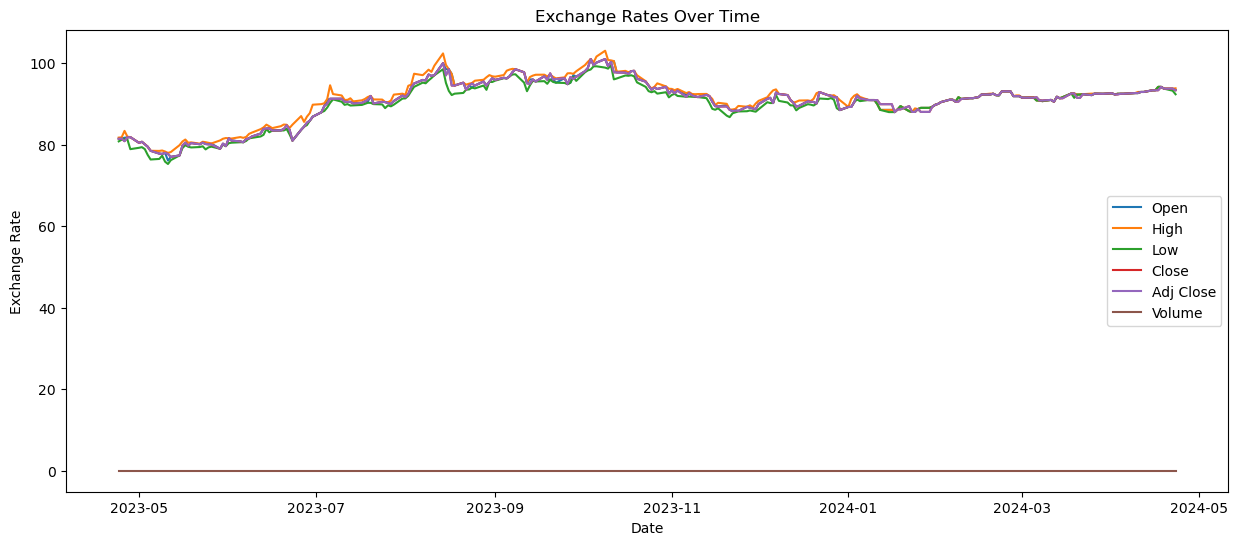

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

plt.figure(figsize=(15, 6))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.title('Exchange Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

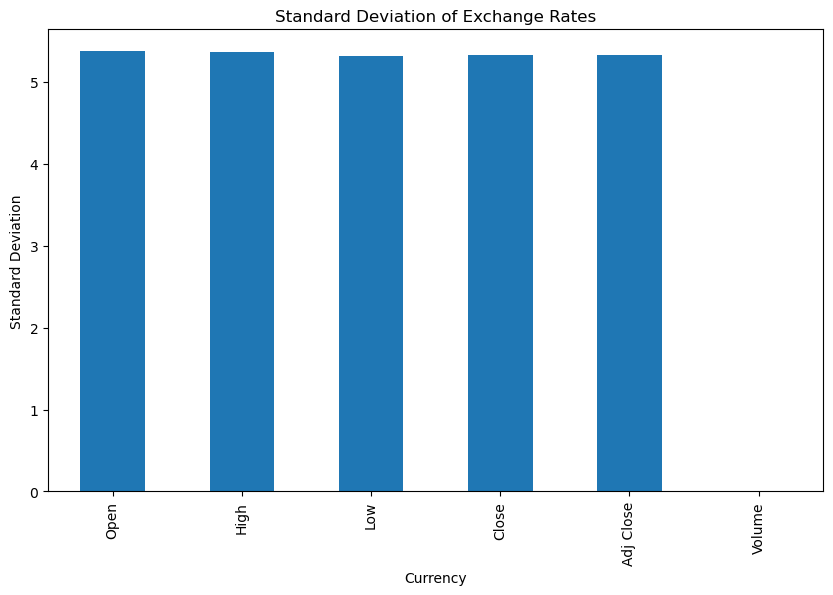

In [11]:
std_dev = df.std()

plt.figure(figsize=(10, 6))
std_dev.plot(kind='bar')
plt.title('Standard Deviation of Exchange Rates')
plt.ylabel('Standard Deviation')
plt.xlabel('Currency')
plt.show()

C:\Users\Jigly\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


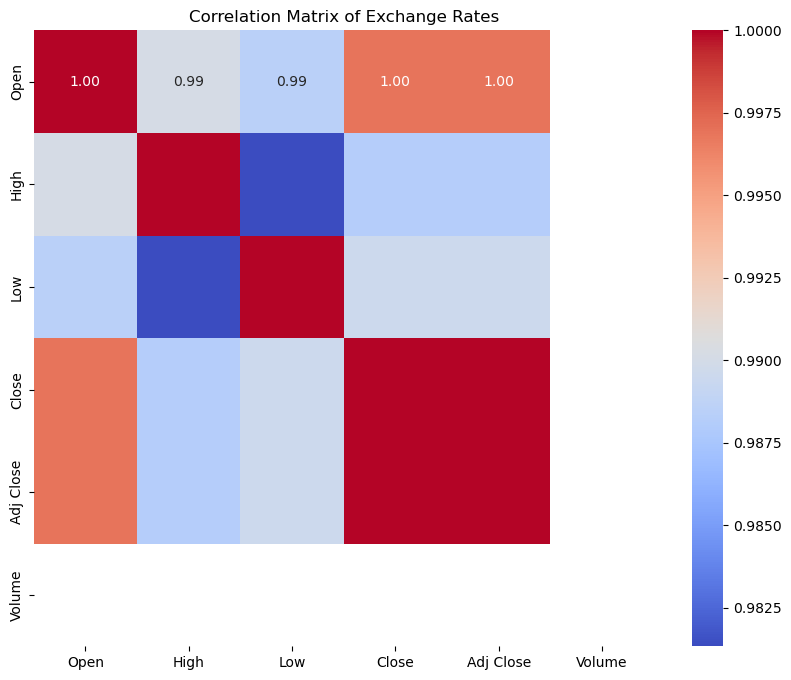

In [12]:
# Корреляционный анализ
correlation_matrix = df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Exchange Rates')
plt.show()

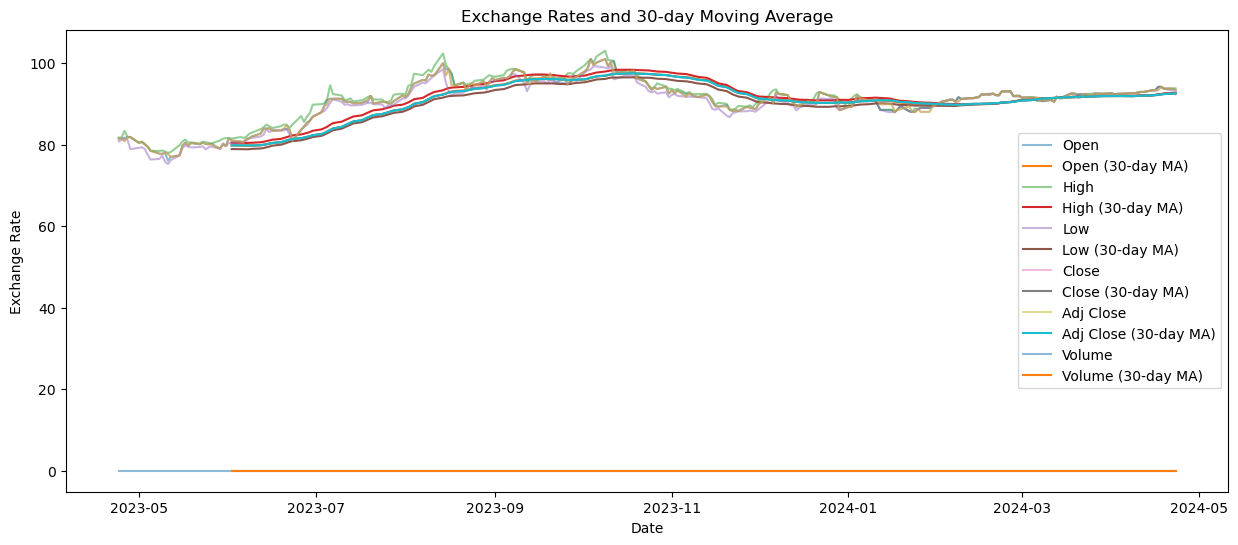

In [13]:
rolling_mean = df.rolling(window=30).mean()

plt.figure(figsize=(15, 6))
for column in df.columns:
    plt.plot(df.index, df[column], label=column, alpha=0.5)
    plt.plot(rolling_mean.index, rolling_mean[column], label=f"{column} (30-day MA)")

plt.title('Exchange Rates and 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [14]:
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


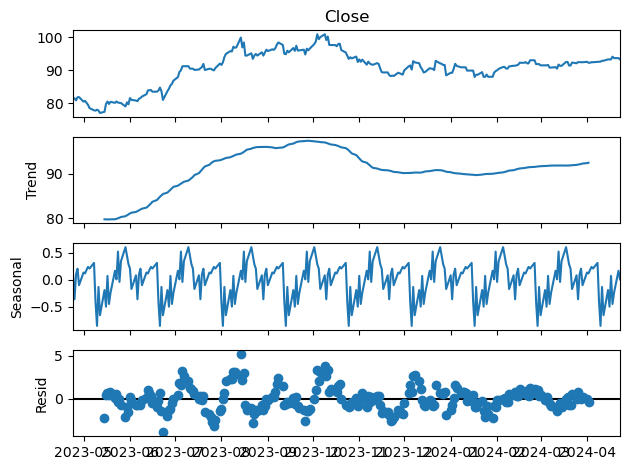

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Декомпозиция
decomposition = seasonal_decompose(df['Close'], model='additive', period=30)

decomposition.plot()
plt.show()

34E:
Method1    1.223999
Method2    1.336050
Method3    1.204384
Method4    1.278213
dtype: float64

MSE:
Method1    1.715077
Method2    1.956831
Method3    1.649688
Method4    1.807577
dtype: float64

RMSE:
Method1    1.309610
Method2    1.398868
Method3    1.284402
Method4    1.344462
dtype: float64


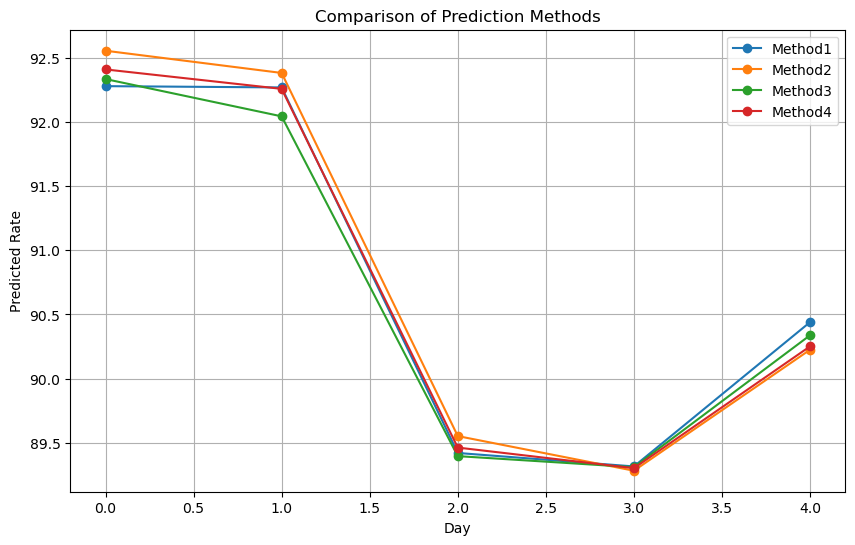

In [18]:
# Сравнение методов предсказания
import numpy as np

predictions = {
    'Method1': [92.279999, 92.269997, 89.419998, 89.315002, 90.440002],
    'Method2': [92.556201, 92.382919, 89.551677, 89.281646, 90.225045],
    'Method3': [92.335300, 92.044550, 89.395448, 89.309101, 90.337825],
    'Method4': [92.410327, 92.258781, 89.462083, 89.301493, 90.251253]
}

df = pd.DataFrame(predictions)

print("MAE:")
print(df.apply(lambda x: np.mean(np.abs(x - x.mean())), axis=0))

print("\nMSE:")
print(df.apply(lambda x: np.mean((x - x.mean())**2), axis=0))

print("\nRMSE:")
print(np.sqrt(df.apply(lambda x: np.mean((x - x.mean())**2), axis=0)))
# Визуализция
plt.figure(figsize=(10, 6))
for column in df.columns:
    plt.plot(df[column], marker='o', label=column)

plt.title('Comparison of Prediction Methods')
plt.xlabel('Day')
plt.ylabel('Predicted Rate')
plt.legend()
plt.grid(True)
plt.show()